   ### NAME: DADA ADEKOYEJO EMMANUEL
   
   ### TOPIC: WORLD HAPPINESS REPORT
   
   ### TUTOR: MR SEGUN YEMI
   
   ### SCHOOL: ZACRAC INTEGRATED LIMITED

# 
					Table of Contents

1.0	Introduction 

1.1	Background

1.2	Aims

1.3	Research Questions

1.4	Objectives

2.0	Methodology

2.1	Data Introduction, Analysis tools,	Analysis and Result Presentation

3.0 Conclusion

4.0 Recommendation

5.0 References
 

## 1.0  Introduction

The world happiness report reveals a bright light in dark times. The pandemic brought not only pain and suffering but also an increase in social support and benevolence. As we battle the ills of disease and war, it is essential to remember the universal desire for happiness and the capacity of individuals to rally for each other’s support in times of great need.

## 1.1 Background

World happiness report is a yearly publication that contains articles and rankings of national happiness based on respondent rankings of their own lives with correlation to the various quality of life factors. 
World happiness report shows the science of happiness that can be used to improve the economy of a nation and helps in policy making by the government.


## 1.2	Aims 

The aim of this project is to investigate the relationship between Sustainable development factors the national happiness of the nation and the GDP of a nation.



## 1.3	Research Questions

The research questions to be answered by this project are:
1.	What are the top 10 and bottom 10 happiest countries in relation to their life expectancy?
2.	How does the happiness score affect the GDP of a nation?
3.	Which region has the highest contribution to the world’s GDP and which has the lowest?
4.	How does the freedom to make life choices relate to the ladder or happiness score?
5.	What are the top 10 most and least corrupt countries?
6.	How does corruption affect the Ladder (Happiness) score.


## 1.4	Objectives

1. Data sets will be cleaned, errors removed to be more accessible and easier to analyze.
2. Important data will be selected to be able to professionally illustrate and visualize the various quality of life factors in respect to the rankings of national happiness.
3. Statistical inferences will be recommended using the data visualizations.


# 2.0	Methodology

For developing the report, Ms excel was used for data wrangling and cleaning, Jupyter notebook was used as a Python IDE for the data analysis and visualization. 
Libraries such as Matplotlib was used for plotting to help data visualization, pandas for dataframe, numpy for analysis, seaborn, scipy, Psycopg2 for using on cross platforms i.e Postgresql, Jupyter Notebook.  

# 2.1	Data Introduction, Analysis tools,	Analysis and Result Presentation

In [15]:
import pandas as pd #dataframe
import numpy as np #analysis
import os
import seaborn as sns
import itertools #for combinations
import scipy
from scipy import stats #significance levels, normality
import warnings
import datetime
import matplotlib.pyplot as plt #plotting


In [7]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [8]:
data = pd.read_csv('C:/Users/pdata pc/Downloads/world-happiness-report.csv')
data.head()

,Country_name,years,Life_Ladder,Log_GDP,Social_support,Healthy_life,Freedom,Generosity,corruption,Positive_affect,Negative_ affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [9]:
data = pd.read_csv('C:/Users/pdata pc/Downloads/world-happiness-report-2021.csv')
data.head()

,Country_name,Regional_indicator,Ladder_score,Standard_error,upperwhisker,lowerwhisker,Logged,Social_support,Healthy,Freedom,Generosity,corruption,Ladder_dystopia,Explained_Log,Explained_Social,Explained_Healthylife,Explained_Freedom,Explained_Generosity,Explained_corruption,Dystopia_residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [10]:
data_columns = ['Country_name', 'Regional_indicator', 'Ladder_score', 'Logged', 'Social_support', 'Healthy', 'Freedom','Generosity', 'corruption']

In [8]:
data = data[data_columns].copy()

### Check if there is any null number in any of the cells

In [11]:
data.isnull().sum()

Country_name             0
Regional_indicator       0
Ladder_score             0
Standard_error           0
upperwhisker             0
lowerwhisker             0
Logged                   0
Social_support           0
Healthy                  0
Freedom                  0
Generosity               0
corruption               0
Ladder_dystopia          0
Explained_Log            0
Explained_Social         0
Explained_Healthylife    0
Explained_Freedom        0
Explained_Generosity     0
Explained_corruption     0
Dystopia_residual        0
dtype: int64

# 1. What are the top 10 and bottom 10 happiest countries in relation to thier life expectancy? 

In [12]:
top_10 = data.head(10)
bottom_10 = data.tail(10)

Text(599.1068181818181, 0.5, 'Life expectancy')

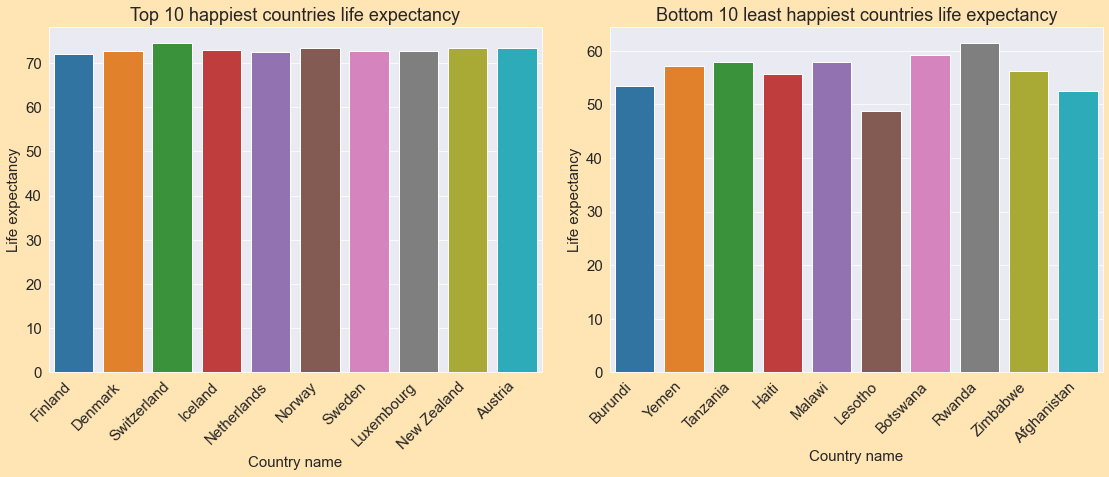

In [13]:
fig, axes=plt.subplots(1,2, figsize=(16, 6))
plt.tight_layout(pad= 2)
xlabels= top_10.Country_name
axes[0].set_title('Top 10 happiest countries life expectancy')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x= top_10.Country_name, y=top_10.Healthy, ax= axes[0])
axes[0].set_xlabel('Country name')
axes[0].set_ylabel('Life expectancy')

xlabels= bottom_10.Country_name
axes[1].set_title('Bottom 10 least happiest countries life expectancy')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x= bottom_10.Country_name, y=bottom_10.Healthy, ax= axes[1])
axes[1].set_xlabel('Country name')
axes[1].set_ylabel('Life expectancy')

### From the above bar plot, we can see that the top 10 countries with higher ladder score live longer than the least happiest countries

# 2. How does the ladder score(Happiness) score affect the GDP of a nation?

Text(0, 0.5, 'Logged_GDP')

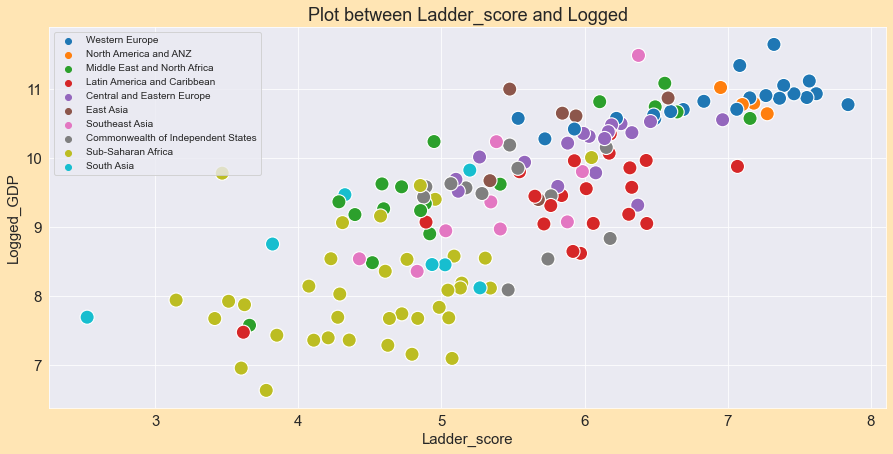

In [14]:
# Plot between happiness and logged_GDP

plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Ladder_score and Logged')
sns.scatterplot(x = data.Ladder_score, y = data.Logged, hue = data.Regional_indicator, s = 200);

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Ladder_score')
plt.ylabel('Logged_GDP')

According to the scatterplot above, we deduce that the region with the lowest ladder score(for happiness ratings) is of the south-asian region as the blue color is used to represent SOUTH-ASIA. 

We can also infer that the south asian country represented here is AFGHANISTAN as according to the happiness report 2021 table, it has the lowest ladder score.

Countries in the sub-saharan region ended up with a lower logged GDP but were still recorded as happier than some countries with higher GDP.

# 3. WHICH REGION HAS THE HIGHEST PERCENTAGE CONTRIBUTION TO THE WORLDS'S GDP AND THE LEAST CONTRIBUTION?

In [11]:
gdp_region = data.groupby('Regional_indicator')['Logged'].sum()
gdp_region

Regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: Logged, dtype: float64

## Plotting with pie plot

Text(0, 0.5, '')

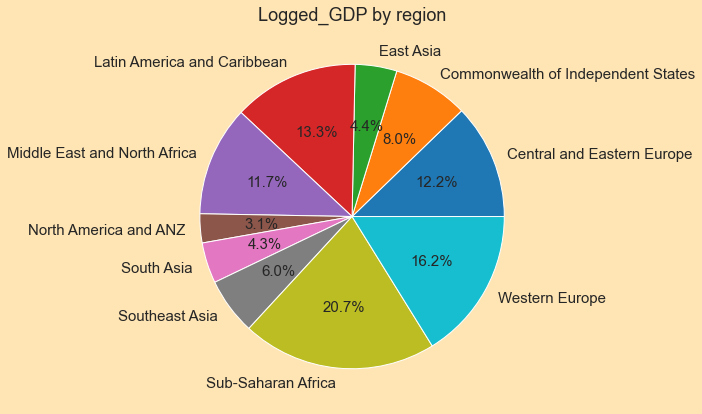

In [12]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('Logged_GDP by region')
plt.ylabel('')

###### From the above plot, Sub saharan countries with 20.7% contribute the most to the GDP, the reason for this is because Sub saharan countries are 36 in number.

# WHICH REGION CONTRIBUTES THE LEAST TO THE WORLD'S GDP?

From the above plot, North America and ANZ countries with 3.1% contribute the least to the GDP.

# 4. How does freedom to make life choices affect Ladder score?

Text(0, 0.5, 'Ladder Score')

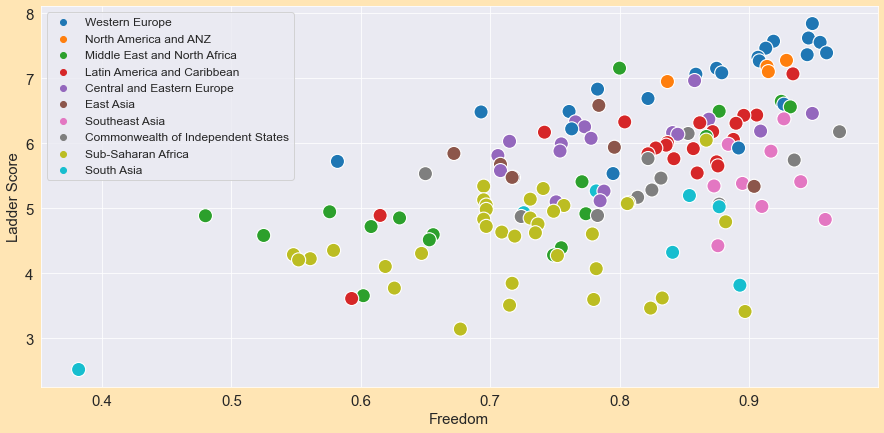

In [33]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x = data.Freedom, y = data.Ladder_score, hue = data.Regional_indicator, s = 200)
plt.legend(loc = 'upper left', fontsize = '12')
plt.xlabel('Freedom')
plt.ylabel('Ladder Score')

 From the above scatterplot, we deduce that the Ladder or happiness score increases as the freedom to make life choices increases in the Western Europe. In the southeast Asia region, we can see that the freedom to make life choices is high but it does not increase the ladder score. In the Middle east and north Africa region denoted by color green, it shows that thier freedom to make life choices is low and that also leads to a decrease in ladder score. In the sub-saharan africa region, some of them have an average freedom to make life choices but that didn't do much to their ladder score. In the south asia region denoted by color blue, we can see the freedom to make life choices and the ladder score are extremely low; we can also make an inference for the country in particular to be Afghanistan. 

# 5. What are the top 10 least and top 10 most corrupt countries?

<BarContainer object of 10 artists>

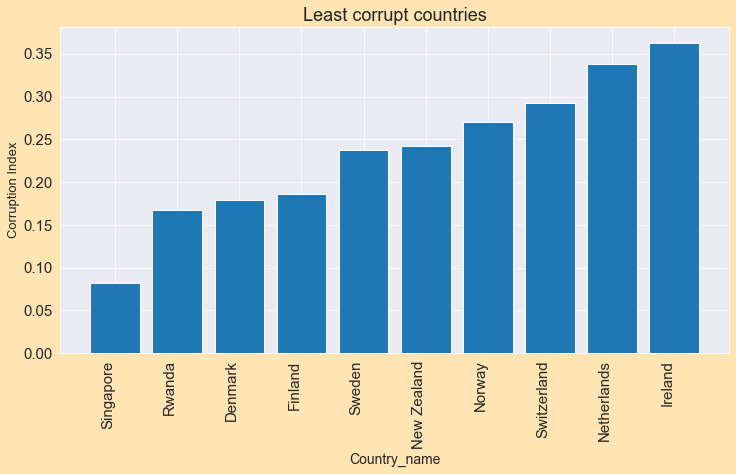

In [38]:
country = data.sort_values(by='corruption').head(10)
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Least corrupt countries')
plt.xlabel('Country_name', fontsize=14)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 90, ha='right')
plt.bar(country.Country_name, country.corruption)

### The bar chart above shows that SIngapore is the least corrupt country followed by Rwanda and Denmark in that order.

<BarContainer object of 10 artists>

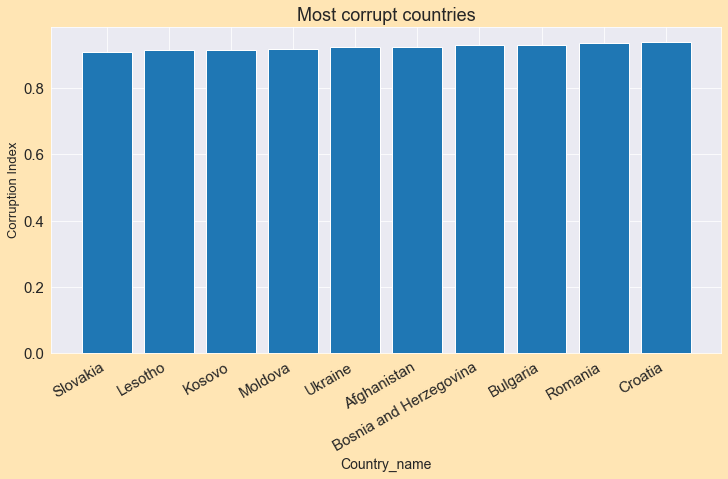

In [35]:
country = data.sort_values(by='corruption').tail(10)
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Most corrupt countries')
plt.xlabel('Country_name', fontsize=14)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha='right')
plt.bar(country.Country_name, country.corruption)

### The above chart shows that all these countries have a corruption index of over 0.85

# 6. How does corruption affect the Ladder (Happiness) score?

Text(0, 0.5, 'corruption')

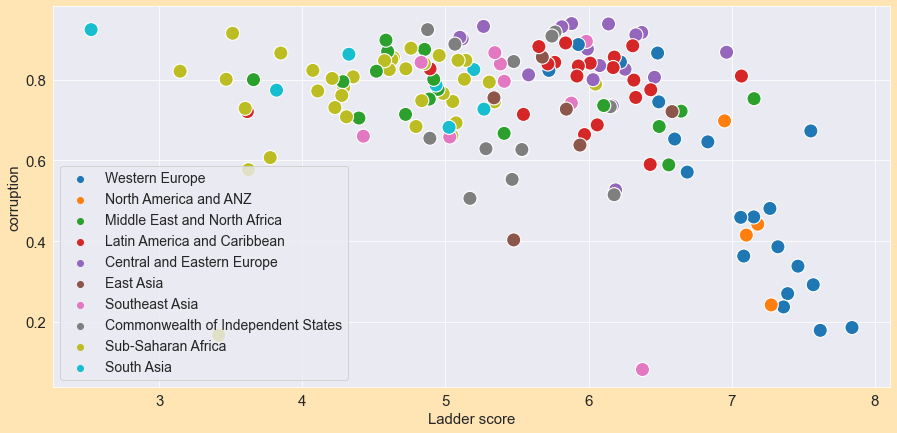

In [36]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x = data.Ladder_score, y =data.corruption, hue=data.Regional_indicator, s=200)
plt.legend(loc='lower left', fontsize = '14')
plt.xlabel('Ladder score')
plt.ylabel('corruption')


#### From the above scatterplot, we can see that the countries with high ladder score have low corruption and countries with low ladder score have high corruption.

# 3.0 Conclusion

The above data analysis and visualization shows that the happiness score (Laddder score) is directly proportional to the  Life Expectancy of the people, that most countries with a low ladder score also in turn have a relatively low GDP. We also conclude that countries with high ladder score have a low corruption rate and countries with low ladder score have high corruption. 

# 4.0 Recommendation

Certain variables such as unemployment or inequality are not considered as comparable data is not yet available across all countries. The dataset should also be totally transparent and comprehensive as the relationship between the freedom to make life choices and the ladder score does not show the exact countries that are affected and we cannot really come to a conclusion as regards that.

# 5.0 References

1. World Happiness Report, 2021. 

2. Amazon AWS, 2021. World Happiness Report

3. Kaggle, 2021. World Happiness Report

# THANK YOU!